# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [28]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import linregress
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f
import seaborn as sns

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
fifa.Value=fifa.Value.str.lstrip('€')
fifa.Value=fifa.Value.str.rstrip('M')
fifa.Value=fifa.Value.str.rstrip('K')
fifa['ValueNumeric']=pd.to_numeric(fifa.Value,errors ='coerce') 
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,72,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


In [5]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [6]:
# Your code here:
#https://www.statsmodels.org/stable/anova.html
fifa['Preferred_foot']=fifa['Preferred Foot']
formula='ValueNumeric ~ C(Position)*C(Preferred_foot)'
modelo=ols(formula=formula, data=fifa).fit()

In [7]:
anova_table=sm.stats.anova_lm(modelo, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Position),26.0,9.006867e+06,346417.962922,4.143877,7.064170e-12
C(Preferred_foot),1.0,7.292211e+04,72922.110443,0.872300,3.503319e-01
C(Position):C(Preferred_foot),26.0,3.050243e+06,117317.045252,1.403355,8.327900e-02
Residual,18093.0,1.512530e+09,83597.550120,NaN,NaN


What is your conclusion from this ANOVA?

In [8]:
# Your conclusions here:
#h0(position): La posicion no influye en el valor (Se rechaza esta hipotesis, PR casi cero)
#h0(pie preferido): El pie de disparo no influye en el valor (No se rechaza esta hipotesis, PR arriba de 0.05)
#Por lo tanto la posicion si influye en el valor del jugador

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [9]:
# Your code here:
formula='ValueNumeric ~ C(Nationality)'
modelo=ols(formula=formula, data=fifa).fit()
anova_table=sm.stats.anova_lm(modelo, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Nationality),163.0,4.292914e+07,263368.987135,3.202987,1.976253e-38
Residual,18043.0,1.483605e+09,82226.058289,NaN,NaN


In [10]:
#h0: El valor de un jugador no influye en su nacionalidad (Se rechaza esta hipotesis, PR casi cero)
#La nacionalidad de un jugador si influye en su valor

What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [11]:
# Your code here:
#Hay 18207 filas, columna clubu tiene a lo mas 241 valores NaN, por lo que eliminarlos no constituye afectación
tam_ant=fifa.shape[0]
fifa.isna().sum(), fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 22 columns):
Name              18207 non-null object
Age               18207 non-null int64
Nationality       18207 non-null object
Overall           18207 non-null int64
Potential         18207 non-null int64
Club              17966 non-null object
Value             18207 non-null object
Preferred Foot    18159 non-null object
Position          18147 non-null object
Weak Foot         18159 non-null float64
Acceleration      18159 non-null float64
SprintSpeed       18159 non-null float64
Stamina           18159 non-null float64
Strength          18159 non-null float64
LongShots         18159 non-null float64
Aggression        18159 non-null float64
Interceptions     18159 non-null float64
Positioning       18159 non-null float64
Vision            18159 non-null float64
Penalties         18159 non-null float64
ValueNumeric      18207 non-null float64
Preferred_foot    18159 non-null object
dt

(Name                0
 Age                 0
 Nationality         0
 Overall             0
 Potential           0
 Club              241
 Value               0
 Preferred Foot     48
 Position           60
 Weak Foot          48
 Acceleration       48
 SprintSpeed        48
 Stamina            48
 Strength           48
 LongShots          48
 Aggression         48
 Interceptions      48
 Positioning        48
 Vision             48
 Penalties          48
 ValueNumeric        0
 Preferred_foot     48
 dtype: int64, None)

In [12]:
fifa=fifa.dropna()
tam_des=fifa.shape[0]
fifa.isna().sum(), fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 22 columns):
Name              17918 non-null object
Age               17918 non-null int64
Nationality       17918 non-null object
Overall           17918 non-null int64
Potential         17918 non-null int64
Club              17918 non-null object
Value             17918 non-null object
Preferred Foot    17918 non-null object
Position          17918 non-null object
Weak Foot         17918 non-null float64
Acceleration      17918 non-null float64
SprintSpeed       17918 non-null float64
Stamina           17918 non-null float64
Strength          17918 non-null float64
LongShots         17918 non-null float64
Aggression        17918 non-null float64
Interceptions     17918 non-null float64
Positioning       17918 non-null float64
Vision            17918 non-null float64
Penalties         17918 non-null float64
ValueNumeric      17918 non-null float64
Preferred_foot    17918 non-null object
dt

(Name              0
 Age               0
 Nationality       0
 Overall           0
 Potential         0
 Club              0
 Value             0
 Preferred Foot    0
 Position          0
 Weak Foot         0
 Acceleration      0
 SprintSpeed       0
 Stamina           0
 Strength          0
 LongShots         0
 Aggression        0
 Interceptions     0
 Positioning       0
 Vision            0
 Penalties         0
 ValueNumeric      0
 Preferred_foot    0
 dtype: int64, None)

In [13]:
print("El nuevo dataframe se redujo un {} % después de eliminar algunas filas con valores NaN".format(((tam_ant-tam_des)/tam_ant)*100))

El nuevo dataframe se redujo un 1.5873015873015872 % después de eliminar algunas filas con valores NaN


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [21]:
# Your code here:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
slope, intercept, r_value, p_value, std_err=linregress(fifa.Stamina,fifa.SprintSpeed)
print("Modelo: slope: %f intercept: %f" % (slope, intercept))
print("R^2: %f"%(r_value**2))

Modelo: slope: 0.571607 intercept: 28.591662
R^2: 0.383683


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [19]:
# Your conclusions here:
formula='Stamina ~ C(SprintSpeed)'
modelo=ols(formula=formula, data=fifa).fit()
anova_table=sm.stats.anova_lm(modelo, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SprintSpeed),84.0,1.960093e+06,23334.442633,162.202304,0.0
Residual,17833.0,2.565457e+06,143.860119,NaN,NaN


In [20]:
f_oneway(fifa.Stamina,fifa.SprintSpeed)

F_onewayResult(statistic=87.89873966360726, pvalue=7.279020383295631e-21)

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [22]:
# Your code here:
slope, intercept, r_value, p_value, std_err=linregress(fifa.Potential,fifa.ValueNumeric)
print("Modelo: slope: %f intercept: %f" % (slope, intercept))
print("R^2: %f"%(r_value**2))

Modelo: slope: -11.132573 intercept: 1062.431223
R^2: 0.055573


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [23]:
# Your conclusions here:
formula='ValueNumeric ~ C(Potential)'
modelo=ols(formula=formula, data=fifa).fit()
anova_table=sm.stats.anova_lm(modelo, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Potential),46.0,2.896101e+08,6.295873e+06,92.317478,0.0
Residual,17871.0,1.218768e+09,6.819806e+04,NaN,NaN


In [24]:
f_oneway(fifa.Potential,fifa.ValueNumeric)

F_onewayResult(statistic=8258.16297746631, pvalue=0.0)

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

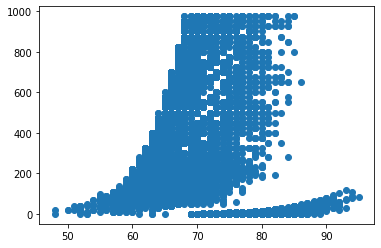

In [26]:
# Your code here:
plt.scatter(fifa.Potential,fifa.ValueNumeric);

In [ ]:
#R^2: 0.055573
#EL plot confirma que no existe relacion lineal entre estas dos columnas

In [29]:
corr = fifa.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Age,Overall,Potential,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
Age,1,0.45,-0.25,0.06,-0.16,-0.15,0.1,0.33,0.16,0.27,0.2,0.085,0.19,0.14,-0.045
Overall,0.45,1,0.66,0.21,0.2,0.21,0.37,0.35,0.42,0.4,0.32,0.36,0.5,0.34,-0.23
Potential,-0.25,0.66,1,0.16,0.24,0.24,0.2,0.075,0.27,0.17,0.16,0.25,0.35,0.22,-0.24
Weak Foot,0.06,0.21,0.16,1,0.26,0.25,0.23,-0.009,0.35,0.13,0.053,0.35,0.34,0.33,-0.05
Acceleration,-0.16,0.2,0.24,0.26,1,0.92,0.61,-0.17,0.58,0.25,0.15,0.68,0.46,0.53,-0.0049
SprintSpeed,-0.15,0.21,0.24,0.25,0.92,1,0.62,-0.084,0.56,0.28,0.16,0.66,0.43,0.52,-0.0014
Stamina,0.1,0.37,0.2,0.23,0.61,0.62,1,0.26,0.6,0.65,0.58,0.64,0.47,0.52,-0.018
Strength,0.33,0.35,0.075,-0.009,-0.17,-0.084,0.26,1,0.05,0.47,0.36,0.0078,-0.047,0.054,-0.011
LongShots,0.16,0.42,0.27,0.35,0.58,0.56,0.6,0.05,1,0.39,0.19,0.86,0.75,0.81,-0.089
Aggression,0.27,0.4,0.17,0.13,0.25,0.28,0.65,0.47,0.39,1,0.75,0.38,0.3,0.34,-0.055
